# Buddhilive Chatbot Training

First we are goin to import the necessary libraries and dependencies. We are goint to use Tensorflow and Keras to train this chatbot

In [0]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


# Download the dataset

The data we need to train the chatbot or the intents are stored in JSON format. We are going to import this data from the GitHub Repository.

In [0]:
#Download Dataset
!git clone https://github.com/Buddhilive/Buddhilive.git

fatal: destination path 'Buddhilive' already exists and is not an empty directory.


Here we retrieve data from the downloded dataset.

*Note: Data downloded here will be lost when the session is over. You'll need to download the dataset again if you are starting a new session*

In [0]:
# import our chat-bot intents file
import json
with open('Buddhilive/Datasets/train_intent.json') as json_data:
    intents = json.load(json_data)

# Training the Model

Now we are going to create a bag of words for the documents and senteces.

In [0]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

27 documents
11 classes ['ability', 'aboutbot', 'goodafternoon!', 'goodbye', 'goodevening', 'goodmorning', 'goodnight', 'greeting', 'noanswer', 'stupidblame', 'thanks']
43 unique stemmed words ['!', "'s", '.', 'a', 'abl', 'afternoon', 'answ', 'anyon', 'ar', 'ask', 'bye', 'can', 'chatbot', 'day', 'do', 'dumb', 'ev', 'good', 'goodby', 'hello', 'help', 'hi', 'how', 'i', 'is', 'lat', 'me', 'morn', 'my', 'nam', 'night', 'not', 'quest', 'see', 'stupid', 'tel', 'thank', 'that', 'ther', 'what', 'who', 'yo', 'you']


Here we are going to create the training data

In [0]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [0]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

# Start Training

Now we are going to start training. This may take some time. Depending on the amount of data, training time may vary.

In [26]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 352       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 11)                99        
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 11ms/step - loss: 2.3893 - acc: 0.0741
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 2.3659 - acc: 0.0741
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 2.3468 - ac

After the training is finished, we need to save the trained model

In [0]:
model.save('Buddhilive_Model.h5')

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

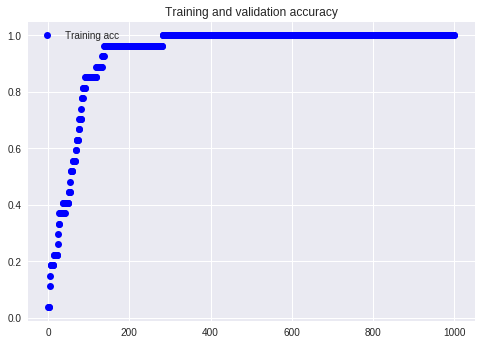

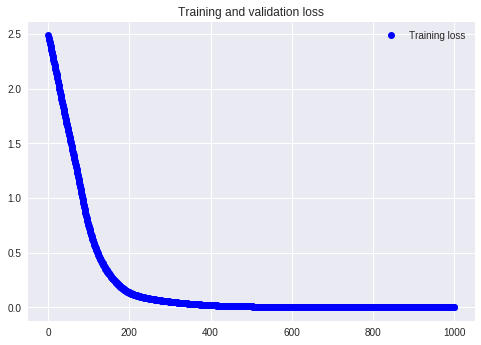

In [0]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [28]:
p = bow("Hello Bot", words)
print (p)
print (classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
['ability', 'aboutbot', 'goodafternoon!', 'goodbye', 'goodevening', 'goodmorning', 'goodnight', 'greeting', 'noanswer', 'stupidblame', 'thanks']


In [0]:
d = len(p)
f = len(documents)-2
a = np.zeros([f, d])

In [0]:
tot = np.vstack((p,a))

In [31]:
prediction = model.predict(tot)
predicted_index = np.argmax(prediction)
predicted_index

7